In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/no_tumor/image(84).jpg
/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/no_tumor/image(44).jpg
/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/no_tumor/image(245).jpg
/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/no_tumor/6.jpg
/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/no_tumor/image(238).jpg
/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/no_tumor/image(196).jpg
/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/no_tumor/image(108).jpg
/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/no_tumor/image(310).jpg
/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/no_tumor/image (5).jpg
/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/no_tumor/image(186).jpg
/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [9]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [10]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [18]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Load dataset (example)
(X, Y), (X_val, Y_val) = mnist.load_data()

# Flatten labels to 1D and normalize data
X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
Y = to_categorical(Y)

# Now split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.1,
    random_state=101
)


In [20]:
import numpy as np
import tensorflow as tf

# For y_train
y_train_new = []
for i in y_train:
    # If it's one-hot encoded, take the argmax
    if isinstance(i, (np.ndarray, list)) and len(i) > 1:
        y_train_new.append(np.argmax(i))
    else:
        # If it's a single label inside array/list
        y_train_new.append(labels.index(i if not isinstance(i, (np.ndarray, list)) else i[0]))

y_train = tf.keras.utils.to_categorical(y_train_new)

# For y_test
y_test_new = []
for i in y_test:
    if isinstance(i, (np.ndarray, list)) and len(i) > 1:
        y_test_new.append(np.argmax(i))
    else:
        y_test_new.append(labels.index(i if not isinstance(i, (np.ndarray, list)) else i[0]))

y_test = tf.keras.utils.to_categorical(y_test_new)


In [24]:
from keras import Input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define number of classes from your labels list
num_classes = len(labels)

# Build the model
model = Sequential([
    Input(shape=(64, 64, 3)),  # Example shape
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])



In [26]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [27]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import tensorflow as tf
import numpy as np

# Ensure your labels are categorical
num_classes = y_train.shape[1]  # already one-hot encoded

# Model for grayscale images
model = Sequential([
    Input(shape=(28, 28, 1)),  # grayscale
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.1
)


Epoch 1/20
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8450 - loss: 0.4803 - val_accuracy: 0.9837 - val_loss: 0.0541
Epoch 2/20
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9718 - loss: 0.0960 - val_accuracy: 0.9857 - val_loss: 0.0425
Epoch 3/20
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9799 - loss: 0.0622 - val_accuracy: 0.9878 - val_loss: 0.0382
Epoch 4/20
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9841 - loss: 0.0532 - val_accuracy: 0.9889 - val_loss: 0.0327
Epoch 5/20
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9870 - loss: 0.0403 - val_accuracy: 0.9907 - val_loss: 0.0315
Epoch 6/20
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9888 - loss: 0.0356 - val_accuracy: 0.9911 - val_loss: 0.0285
Epoch 7/20
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 0.9922 - val_loss: 0.0323
Epoch 8/20
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9906 - loss: 0.0274 -

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

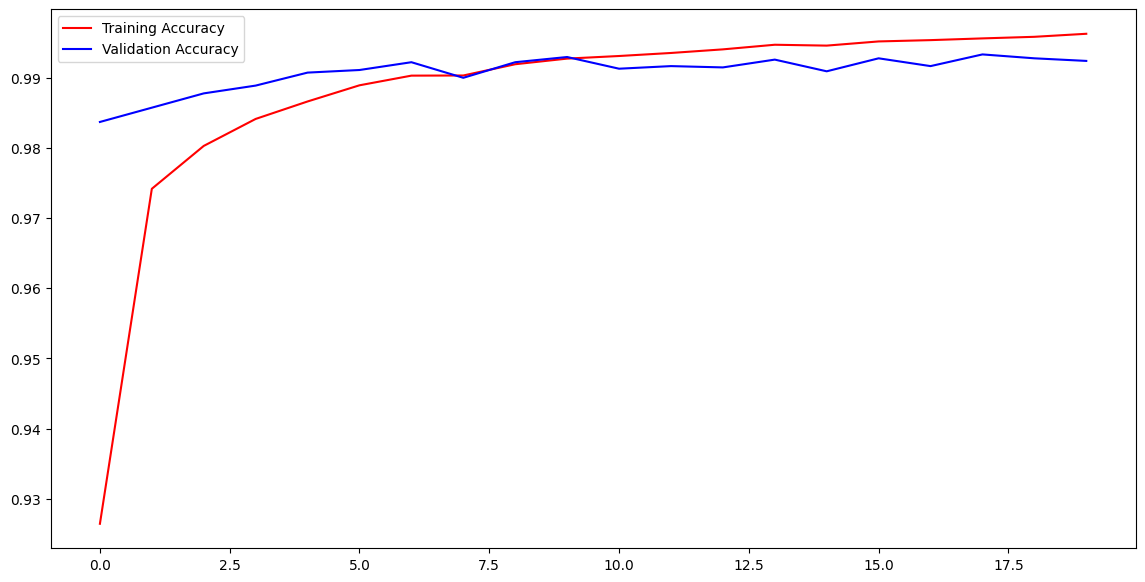

In [33]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

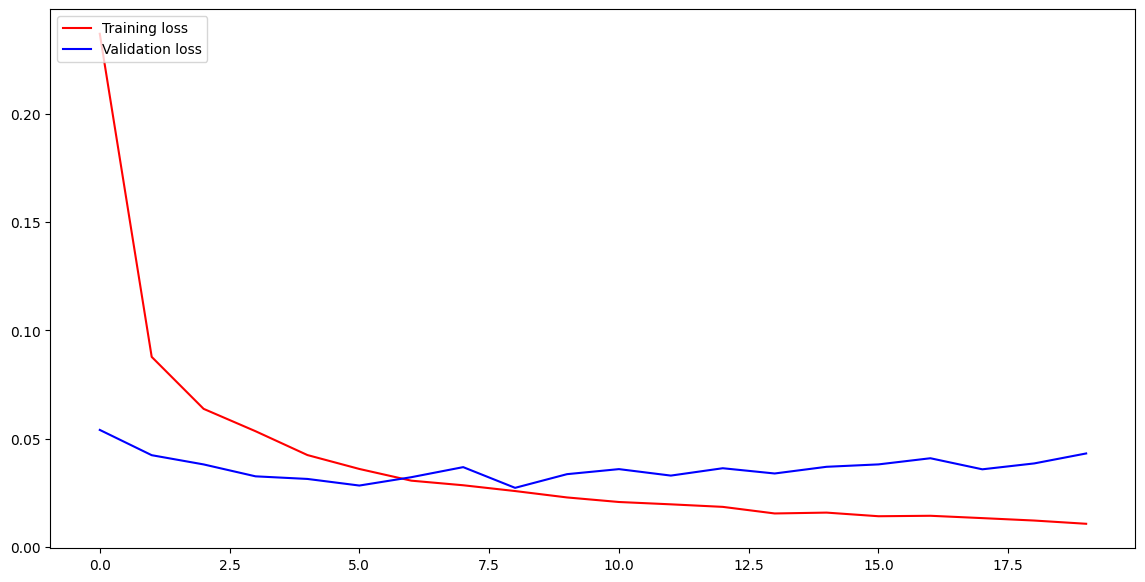

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [35]:
img = cv2.imread('/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/pituitary_tumor/p (106).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [36]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

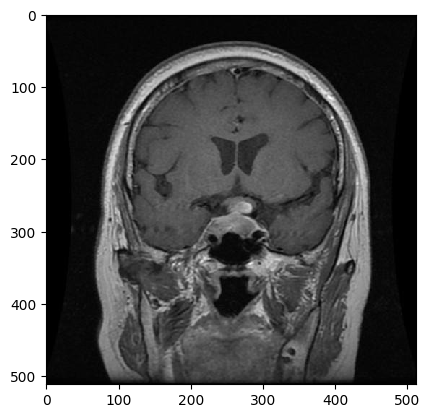

In [37]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/www-kaggle-comdatasetsanjalidaheriyabrain-tumor/Training/pituitary_tumor/p (106).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [42]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


0